<a href="https://colab.research.google.com/github/DanielJacksonEdu/GEOG5302M-Programming-for-Data-Science/blob/main/Lab3/Lab3_WranglingVis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 3
## Data Wrangling and Visualisation

Welcome to the Week 3 lab for GEOG5302 Data Science for Practical Applications! In this session, we will be continuing on from last week, applying our understanding of statistics and getting started on some data wrangling and visualisation. You might need to refer to your notes from the first couple of weeks for a few of the questions. <br>
This week, as per standard Python practice, we begin by loading the packages we'll need, which is pandas again this week. We'll also use two different visualisation packages (pyplot and seaborn), so we'll load these in here, too.

In [163]:
import pandas as pd #importing pandas
pd.options.mode.chained_assignment = None #this just turns off some error messages we don't need
import matplotlib.pyplot as plt #import matplotlib's pyplot interface, and give it the nickname plt
import seaborn as sns #for some smarter visualisations, nicknamed sns

This week were working with some new data, which describes the proportions of different land usea and populations across Local Authorities in England. This data is provided in three separate `.csv` files, so we'll need to load them in separately and join them together.
<br><br>
__Note:__ In these labs we're mostly going to be working with .csv data using Pandas. Other data formats (e.g. Excel) can be imported easily, the documentation for these tools can be found [here.](http://pandas.pydata.org/pandas-docs/stable/io.html)
<br><br>
First we load in the 'LandUse_England' dataset and call it 'LandUse'

In [164]:
LandUse = pd.read_csv('LandUse_England.csv')#load in the data

To check it's loaded correctly, we'll just view the top few rows. Complete the code below (see week 1's lab if you need a hint!)

In [165]:
LandUse.head() #view the top few rows

,LAD22CD,LAD22NM,LAs_London,Community_Buildings,Defence,Commerce,Landfill,Mining,Residential,Transport,Utilities,Unknown_development,Agriculture,Forests,Natural,Grassland,Water,Recreation,Gardens,Vacant
0,E92000001,England,NaN,0.7,0.0,0.4,0.0,0.1,1.3,4.2,0.2,1.9,63.1,10.7,4.9,3.4,1.1,2.1,4.9,0.2
1,E12000004,East Midlands,NaN,0.6,0.0,0.3,0.0,0.2,1.0,3.8,0.2,1.9,73.5,7.3,1.9,1.3,1.3,1.7,4.1,0.2
2,E12000006,East of England,NaN,0.7,0.0,0.3,0.0,0.0,1.1,4.0,0.2,1.7,72.3,8.7,0.9,0.9,1.4,2.0,4.9,0.2
3,E12000007,London,NaN,4.9,0.0,2.1,0.0,0.0,10.7,16.3,0.3,6.3,10.3,5.4,0.1,0.7,1.2,13.9,24.0,0.7
4,E12000001,North East,NaN,0.6,0.0,0.4,0.0,0.1,1.0,3.5,0.1,1.5,48.3,13.9,15.4,8.9,0.9,1.6,2.7,0.2


To list all the columns, we can use the the `info()` command. Try it out below.

In [166]:
LandUse.info() #call info to view the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   LAD22CD              319 non-null    object 
 1   LAD22NM              319 non-null    object 
 2   LAs_London           309 non-null    object 
 3   Community_Buildings  319 non-null    float64
 4   Defence              319 non-null    float64
 5   Commerce             319 non-null    float64
 6   Landfill             319 non-null    float64
 7   Mining               319 non-null    float64
 8   Residential          319 non-null    float64
 9   Transport            319 non-null    float64
 10  Utilities            319 non-null    float64
 11  Unknown_development  319 non-null    float64
 12  Agriculture          319 non-null    float64
 13  Forests              319 non-null    float64
 14  Natural              319 non-null    float64
 15  Grassland            319 non-null    flo

## Introduction to Data Wrangling
We'll start this lab by exploring our data sets, and dealing with a few of the common problems we see in data analytics. We'll use statistics and visualisations to help us do this.

<br><br><br>
## Not a Number

Something doesn't look quite right with the strings
appearing in our LAs_London Column, which tells us whether or not the local area is in London. Call the column again and have a look at the top 15 rows:

In [167]:
LandUse['LAs_London'].head(15) #call the top 15 rows

,LAs_London
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


`NaN` stands for 'Not a Number', meaning there is missing data in this row. Call up the whole data frame below and think about why this might be.

In [168]:
LandUse['LAs_London'] #call the dataframe

,LAs_London
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
314,Not_London
315,Not_London
316,Not_London
317,Not_London


You might notice that these Local Areas aren't actually Local Areas at all, but averages for increasing geographical areas. This means that some rows don't have the relevant data if we just want to know whether or not a local area is in London. This other area information might be really useful for comparing data, we don't need it for our analyses of the individual Local Areas. To select just the affected rows, we can use location indexing (`iloc`) to call up rows and columns (`dataframeiloc[[rows], [columns]]` and use a comma to separate the different rows in a list:

In [169]:
LandUse.iloc[[0,1,2,3,4,5,6,7,8,9],:]

,LAD22CD,LAD22NM,LAs_London,Community_Buildings,Defence,Commerce,Landfill,Mining,Residential,Transport,Utilities,Unknown_development,Agriculture,Forests,Natural,Grassland,Water,Recreation,Gardens,Vacant
0,E92000001,England,NaN,0.7,0.0,0.4,0.0,0.1,1.3,4.2,0.2,1.9,63.1,10.7,4.9,3.4,1.1,2.1,4.9,0.2
1,E12000004,East Midlands,NaN,0.6,0.0,0.3,0.0,0.2,1.0,3.8,0.2,1.9,73.5,7.3,1.9,1.3,1.3,1.7,4.1,0.2
2,E12000006,East of England,NaN,0.7,0.0,0.3,0.0,0.0,1.1,4.0,0.2,1.7,72.3,8.7,0.9,0.9,1.4,2.0,4.9,0.2
3,E12000007,London,NaN,4.9,0.0,2.1,0.0,0.0,10.7,16.3,0.3,6.3,10.3,5.4,0.1,0.7,1.2,13.9,24.0,0.7
4,E12000001,North East,NaN,0.6,0.0,0.4,0.0,0.1,1.0,3.5,0.1,1.5,48.3,13.9,15.4,8.9,0.9,1.6,2.7,0.2
5,E12000002,North West,NaN,0.9,0.0,0.5,0.0,0.1,1.5,4.5,0.1,2.2,48.4,9.4,13.7,8.7,1.6,2.4,4.9,0.2
6,E12000008,South East,NaN,1.0,0.0,0.4,0.0,0.0,1.5,4.8,0.2,2.0,58.6,16.7,1.1,1.2,1.2,3.1,7.1,0.2
7,E12000009,South West,NaN,0.4,0.0,0.2,0.0,0.0,0.8,3.6,0.2,1.6,68.6,11.4,3.2,3.4,0.8,1.2,3.7,0.1
8,E12000005,West Midlands,NaN,0.8,0.0,0.4,0.0,0.0,1.3,4.3,0.1,2.2,68.9,10.1,0.6,1.2,1.1,2.2,5.5,0.2
9,E12000003,Yorkshire and The Humber,NaN,0.6,0.0,0.4,0.0,0.1,1.0,3.9,0.1,1.8,60.7,8.4,10.3,5.3,1.0,1.6,3.8,0.1


We don't need these rows for our current analyses, so we can make a new data frame, omitting these rows. We can use a technique called _slicing_. We want to keep just rows 10-318. The command is `dataframe[start_row : end_row]`. Leaving either side of the colon blank means you'll go with the default start and end of the data set.
Update the code below, adding the first row (row 10) that we want to keep, before the colon:
<br>
__Note:__ (annoyingly) this only works for rows in data frame rows, not columns, but it suits our purposed here just fine.

In [170]:
LandUseEng = LandUse[10:].copy() #complete this code to return rows from 10 to the end

If we want to choose a different end point, we put this after the colon. Let's have a look at our new data frame!

In [171]:
LandUseEng #call your new dataframe here

,LAD22CD,LAD22NM,LAs_London,Community_Buildings,Defence,Commerce,Landfill,Mining,Residential,Transport,Utilities,Unknown_development,Agriculture,Forests,Natural,Grassland,Water,Recreation,Gardens,Vacant
10,E07000223,Adur,Not_London,3.2,0.0,0.8,0.0,0.0,4.5,10.8,0.2,2.9,50.7,4.0,1.5,2.2,0.8,3.1,13.4,0.4
11,E07000026,Allerdale,Not_London,0.2,0.0,0.1,0.0,0.0,0.3,2.3,0.1,1.0,55.2,7.1,20.3,8.2,2.0,1.5,1.3,0.1
12,E07000032,Amber Valley,Not_London,0.8,0.0,0.6,0.0,0.0,1.6,4.2,0.1,2.8,66.5,9.8,0.2,0.8,0.8,3.4,7.1,0.3
13,E07000224,Arun,Not_London,0.8,0.0,0.4,0.0,0.1,2.6,5.7,0.4,2.9,55.2,16.3,0.6,0.7,0.7,2.0,9.6,0.4
14,E07000170,Ashfield,Not_London,1.9,0.0,1.7,0.1,0.0,3.4,7.1,0.4,3.9,42.8,14.0,0.0,1.3,0.5,7.5,12.5,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,E07000229,Worthing,Not_London,3.8,0.0,1.3,0.0,0.0,10.2,13.5,0.3,4.9,16.3,5.1,0.8,0.7,0.1,10.5,29.9,0.2
315,E07000238,Wychavon,Not_London,0.4,0.0,0.2,0.1,0.0,0.8,3.7,0.2,2.0,76.4,7.9,0.1,0.8,1.1,1.1,4.4,0.1
316,E07000128,Wyre,Not_London,1.1,0.0,0.3,0.1,0.0,1.5,4.0,0.2,2.4,66.2,4.8,8.3,1.7,1.5,1.4,5.3,0.3
317,E07000239,Wyre Forest,Not_London,0.9,0.0,0.5,0.0,0.0,1.7,4.6,0.0,2.3,56.6,18.4,0.3,1.2,1.3,2.7,8.1,0.1


We now only have data for the relevant Local Areas, but we've kept the original data set separate, in case we need to fall back on it. This is good practice when working with different parts of data.

<br><br><br>
## Plotting with pyplot and seaborn
Now we've made sure the data covers the area we'd expect, we can start to create some basic plots. One of the simplest is a histogram, which we had a little look at in week 1 and 2.

We'll start by using the `pyplot` package to examine the different types of 'natural' land use. Pyplot is a more basic plotting package for Python. It's quite quick and easy to use, and gives you some control over the design of your plot.

First, we'll create a histogram of the proportion of forests in each local area. We can make a basic histogram using just the `.hist()` command:

<Axes: >

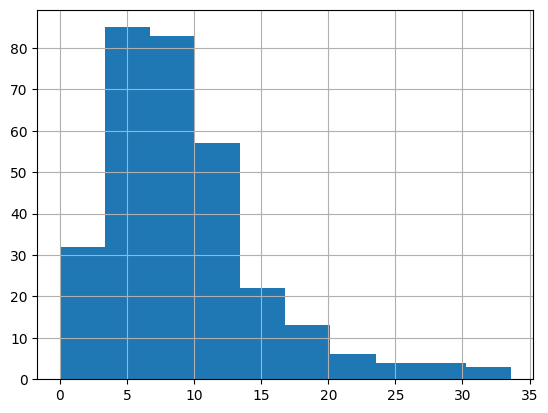

In [172]:
LandUseEng['Forests'].hist()

Pretty easy, right? There are a few things we can change to personalise our plot. For example, the number of bins (bars) on a plot. Can you figure out how to specify 100 bins, by adding `bins = ` in the brackets?

<Axes: >

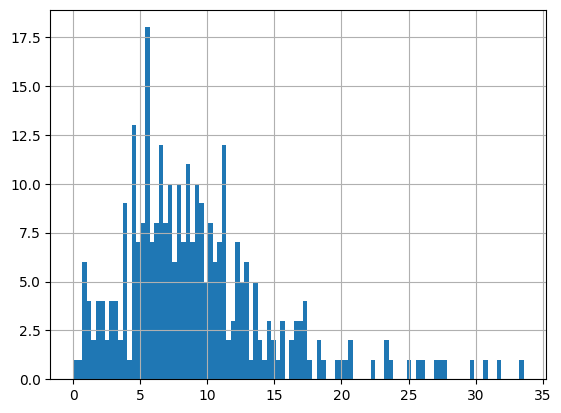

In [173]:
LandUseEng['Forests'].hist(bins=100) #create a histogram with 100 bins

We can also change the colours, by adding the `color` option to the brackets. Can you figure out how to make your histogram red?

<Axes: >

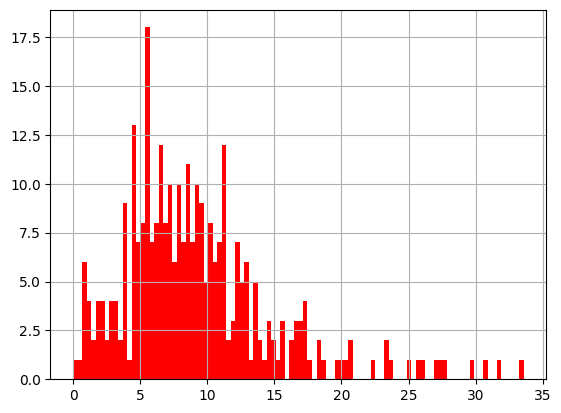

In [174]:
LandUseEng['Forests'].hist(bins=100, color = 'r') #create a histogram with 100 bins#make the histogram red

More colour options for pyplot can be found [here](https://matplotlib.org/stable/gallery/color/named_colors.html).

But often one of the easiest ways to personalise our plots is to use the `seaborn` package, which is good for producing cleaner and more professional looking plots. These can have a bit more editting flexibility, as the package does more behind the scenes. We're practicing both methods this week, but really you can mostly stick with what feels most comfortable to you.

The command below will create a histogram. Note that, this time, all the information for the plot goes within the brackets- including the data.

<Axes: xlabel='Forests', ylabel='Count'>

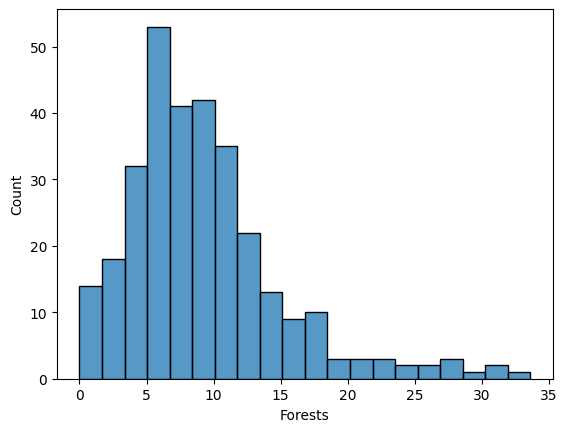

In [175]:
sns.histplot(LandUseEng['Forests'])

Notice that `seaborn` automatically does some helpful things, like adding axis labels. However, the `Forests` column actually refers to the _percentage_ of forests in each area, so we can update our axis labels to reflect this.

The format for customising aspects of our plots can use the best of seaborn and pyplot functions. We start by creating a new `fig` (figure) with axes (`ax`), then telling python which plot to create (using either `plt` or `sns`), and then using `plt` commands to add additional elements.

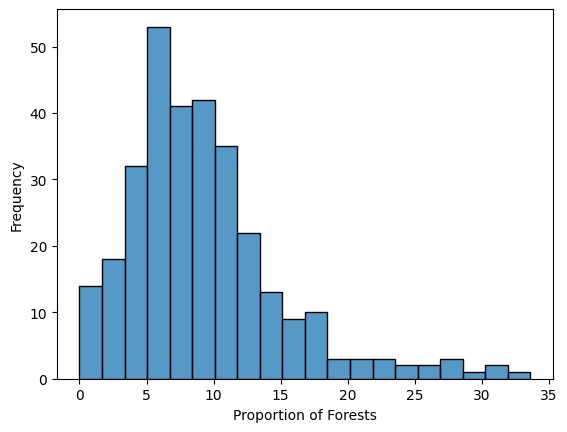

In [176]:
fig, ax = plt.subplots()
sns.histplot(LandUseEng['Forests']) #create the figure
plt.xlabel('Proportion of Forests') #update the x label
plt.ylabel('Frequency') #add a y label
plt.show() #show the plot- and remove any additional information that we don't need

Can you figure out how to add one more line to add a title to the plot, before running `show`? [This](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html) function documentation may help if you get stuck.

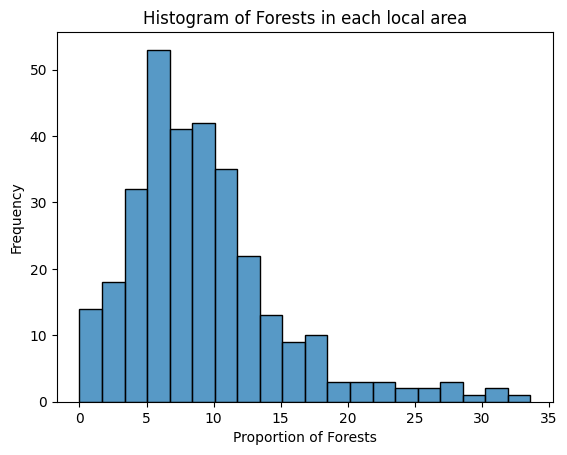

In [177]:
#create your histogram with a title here
fig, ax = plt.subplots()
sns.histplot(LandUseEng['Forests']) #create the figure
plt.xlabel('Proportion of Forests') #update the x label
plt.ylabel('Frequency') #add a y label
plt.title('Histogram of Forests in each local area')
plt.show() #show the plot- and remove any additional information that we don't need

As before, we can update the number of bins on our plot,by just adding the `bins` command to our function. Create a seaborn histogram with 100 bins below:

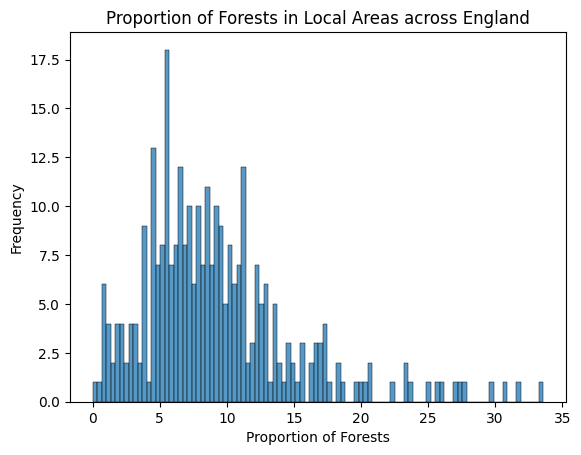

In [178]:
fig, ax = plt.subplots()
sns.histplot(LandUseEng['Forests'], bins = 100) #create the figure with 100 bins
plt.xlabel('Proportion of Forests')
plt.ylabel('Frequency')
plt.title('Proportion of Forests in Local Areas across England')
plt.show()

Seaborn also allows us to do some cool things like break up our bars according to a second variable. Here we'll use the LAs_London variable, which tells us whether a Local Authority is in London or not. We'll tell seaborn to use a different `hue` (colour) according to this variable

<Axes: xlabel='Forests', ylabel='Count'>

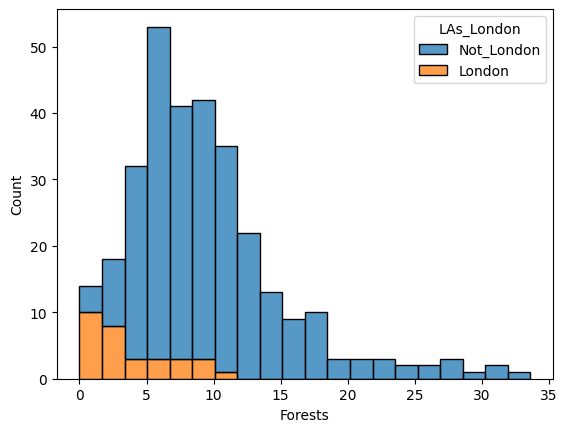

In [179]:
sns.histplot(LandUseEng, x = "Forests", hue = 'LAs_London', multiple ='stack')
#hue specifies the second variable, and multiple shows the colours should be stacked

We can also plot the bars next to each other. Can you figure out how to do this using the information [here](https://seaborn.pydata.org/tutorial/distributions.html)?

<Axes: xlabel='Forests', ylabel='Count'>

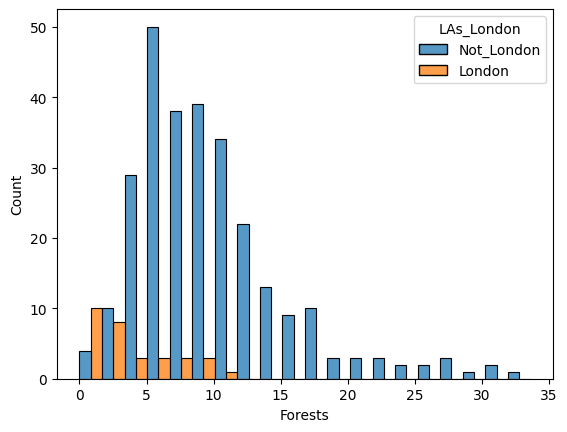

In [180]:
#recreate the plot above, but plot the bars next to each other
sns.histplot(LandUseEng, x = "Forests", hue = 'LAs_London', multiple ='dodge')

<br> <br><br>
## Identifying outliers
Outliers are a common problem in data, and can be caused by a number of things: input error, problems with measuring equipment, incorrect calculations, or sometimes just data that happens to be much higher or lower than our 'normal range'.

A word of warning- there are some outliers in the Water column, which tells us the percentage of each local area comprising bodies of water (lakes, rivers, etc)! Let's have a look at statistics to figure out where it is. Last week we used the `.describe()` function to find out information on all variables.

In [181]:
#describe the Water column
LandUseEng['Water'].describe()

,Water
count,309.000000
mean,2.203560
std,11.637287
min,0.000000
25%,0.700000
50%,1.000000
75%,1.600000
max,150.000000


Can you spot anything that doesn't look quite right? Have a look at the maximum and minimum values.  Remember these are percentages of a total area- so should be less than 100!

It can be helpful to viusalise this distibution to check it makes sense. Histograms can be great for this, but creating a box plot also allows us to identify points that fall outside of the interquartile range. We'll start with a simple box plot of our `water` variable, to see if we can figure out what's going on. Some of this should be familair from last week!

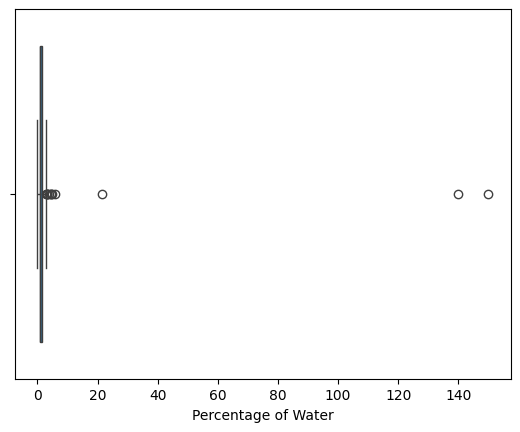

In [182]:
fig, ax = plt.subplots()
sns.boxplot(data = LandUseEng, x = "Water")
plt.xlabel("Percentage of Water")

plt.show()

You should now be able to see very clearly that we have two values way outside the range of the other data points, which are all closer to 10. Can you figure out what's gone wrong here?

As a percentage, it looks like the decimal point has been typed in the wrong place- which is an easy mistake to make when entering data by hand. We can move this by assigning the correct value at the right location. Let's check the actual maximum value:
__Hint:__ We did this in week 1!

In [183]:
#check the maximum value
LandUseEng['Water'].max()

150.0

As the value should be a percentage, we can assume that anything greater than 100 is an error. To check what the correct value might be, we can check the mean.

In [184]:
#check the mean value
LandUseEng['Water'].mean()

2.203559870550162

As the mean is just over 2%, we can assume that our correct value should be 1.5 (rather than 15).
We can use a quick function to divide any value greater than 100 by 100, to bring them in line with the other values. We can use `.loc` to identify where the value is > 100.

In [185]:
LandUseEng.loc[LandUseEng['Water'] > 100]

,LAD22CD,LAD22NM,LAs_London,Community_Buildings,Defence,Commerce,Landfill,Mining,Residential,Transport,Utilities,Unknown_development,Agriculture,Forests,Natural,Grassland,Water,Recreation,Gardens,Vacant
153,E08000035,Leeds,Not_London,2.1,0.0,1.3,0.1,0.1,3.5,9.2,0.1,4.0,44.1,10.1,0.5,1.0,150.0,6.4,12.1,0.4
287,E08000036,Wakefield,Not_London,1.7,0.0,1.4,0.0,0.0,2.9,7.7,0.6,4.3,51.2,8.5,0.2,1.2,140.0,6.2,10.3,0.3


It's good practice to assign the cleaned values to a new variable, so we don't interfere with the original data. We start by copying the column(s) we want to work with to a new variable.  Notice earlier we used the `.iloc` function, whereas now we're using `.loc`. This is because `loc` works with a column _name_, while `iloc` works with a column _index_. Don't worry about this too much, if you use the wrong one, Python will give you a helpful error message!

In [186]:
LandUseEng.loc[:,'Water_Clean'] = LandUseEng.loc[:, 'Water']

We now edit our outliers. In this case, with the decimal being too far to the right, we can simply divide the value greater than 100 by 100, to correct the error.

In [187]:
LandUseEng.loc[LandUseEng['Water_Clean']>100, 'Water_Clean'] = LandUseEng['Water_Clean']/100

We can check it's worked by recalculating our `.describe()`, this time using the new Water_Clean variable. Try this out below:

In [188]:
#describe the new variable
LandUseEng['Water_Clean'].describe()

,Water_Clean
count,309.000000
mean,1.274434
std,1.412017
min,0.000000
25%,0.700000
50%,1.000000
75%,1.500000
max,21.600000


This looks good- now we can rebuild our box plot to see how our corrected distribution looks:

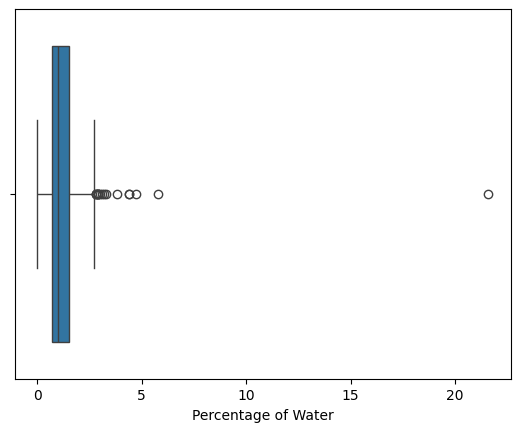

In [189]:
#create a box plot using the new Water variable
fig, ax = plt.subplots()
sns.boxplot(data = LandUseEng, x = "Water_Clean")
plt.xlabel("Percentage of Water")

plt.show()

We can now customise our plot. We can easily rotate the plot by changing the x variable to a y variable, try it out. Remember you'll need to change the labels, too!

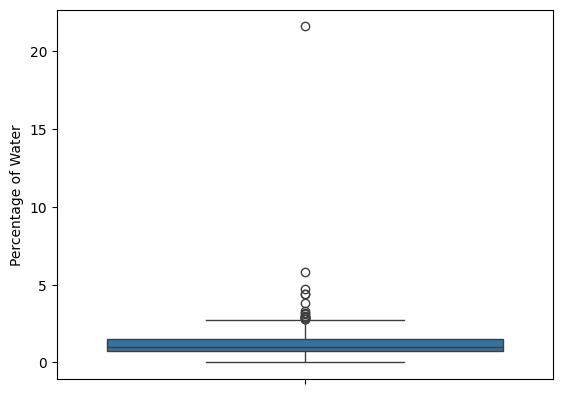

In [190]:
#your vertical box plot here
fig, ax = plt.subplots()
sns.boxplot(data = LandUseEng, y = "Water_Clean")
plt.ylabel("Percentage of Water")

plt.show()

<br><br><br>
## Joining Data
To get more insight on our data, we can add extra variables by joining up data sets, provided they share a common variable. You should be able to see from the data that all the data frames include the same `LAD22CD` field, Pandas will use this to combine the data.
<br>
We'll start simple, by just joining one column, which includes the area of each local authority. <br>
Read in the LA_Area.csv file and call it `area`.

In [191]:
#load in the Area data
area = pd.read_csv('LA_Area_Regions.csv')

Call up the top few rows of the data to see what it looks like and check it has a shared `LA22CD` column with the Land Use data:

In [192]:
#view the head of the data
area.head()

,LAD22CD,Name,Region,Area
0,E07000223,Adur,SouthEast,4.364796e+07
1,E07000026,Allerdale,NorthWest,1.320568e+09
2,E07000032,Amber Valley,EastMids,2.654379e+08
3,E07000224,Arun,SouthEast,2.247033e+08
4,E07000170,Ashfield,EastMids,1.095580e+08


Then run the join. This takes the index `LADCD22` in the area data and joins to `LADCD22` in the Land Use data frame.

In [193]:
LandUseArea = LandUseEng.join(area.set_index('LAD22CD'), on = 'LAD22CD')

Now call `.head()` on your data frame, to view the updated version:

In [194]:
#view the top of the new data frame
LandUseArea.head()

,LAD22CD,LAD22NM,LAs_London,Community_Buildings,Defence,Commerce,Landfill,Mining,Residential,Transport,...,Natural,Grassland,Water,Recreation,Gardens,Vacant,Water_Clean,Name,Region,Area
10,E07000223,Adur,Not_London,3.2,0.0,0.8,0.0,0.0,4.5,10.8,...,1.5,2.2,0.8,3.1,13.4,0.4,0.8,Adur,SouthEast,4.364796e+07
11,E07000026,Allerdale,Not_London,0.2,0.0,0.1,0.0,0.0,0.3,2.3,...,20.3,8.2,2.0,1.5,1.3,0.1,2.0,Allerdale,NorthWest,1.320568e+09
12,E07000032,Amber Valley,Not_London,0.8,0.0,0.6,0.0,0.0,1.6,4.2,...,0.2,0.8,0.8,3.4,7.1,0.3,0.8,Amber Valley,EastMids,2.654379e+08
13,E07000224,Arun,Not_London,0.8,0.0,0.4,0.0,0.1,2.6,5.7,...,0.6,0.7,0.7,2.0,9.6,0.4,0.7,Arun,SouthEast,2.247033e+08
14,E07000170,Ashfield,Not_London,1.9,0.0,1.7,0.1,0.0,3.4,7.1,...,0.0,1.3,0.5,7.5,12.5,0.4,0.5,Ashfield,EastMids,1.095580e+08


As we just learnt in the lecture, there are different forms/directions of joining tables. Can you look at the above code, and maybe the `.join()` documentation (search Google for this) to figure out what type of join this was?

We're going to add one more data set, which tells us the population of each local area, as well as some information about the type of area. It's your turn to practice loading in the data, checking for shared columns, and adding them to the LandUseArea data to create our final dataset.

In [195]:
#load in the population data
pop = pd.read_csv('LA_Population.csv')

In [196]:
#check for shared columns
pop.head()

,LAD22CD,Geography,Population
0,K04000001,Country,60245218
1,E92000001,Country,57112542
2,E12000001,Region,2682069
3,E06000047,Unitary Authority,527704
4,E06000005,Unitary Authority,109413


In [197]:
#join the data
LandUsedf = LandUseArea.join(pop.set_index('LAD22CD'), on = 'LAD22CD')

In [198]:
#view the top of the dataset to check it's worked
LandUsedf.head()

,LAD22CD,LAD22NM,LAs_London,Community_Buildings,Defence,Commerce,Landfill,Mining,Residential,Transport,...,Water,Recreation,Gardens,Vacant,Water_Clean,Name,Region,Area,Geography,Population
10,E07000223,Adur,Not_London,3.2,0.0,0.8,0.0,0.0,4.5,10.8,...,0.8,3.1,13.4,0.4,0.8,Adur,SouthEast,4.364796e+07,Non-metropolitan District,64725
11,E07000026,Allerdale,Not_London,0.2,0.0,0.1,0.0,0.0,0.3,2.3,...,2.0,1.5,1.3,0.1,2.0,Allerdale,NorthWest,1.320568e+09,Non-metropolitan District,96556
12,E07000032,Amber Valley,Not_London,0.8,0.0,0.6,0.0,0.0,1.6,4.2,...,0.8,3.4,7.1,0.3,0.8,Amber Valley,EastMids,2.654379e+08,Non-metropolitan District,126934
13,E07000224,Arun,Not_London,0.8,0.0,0.4,0.0,0.1,2.6,5.7,...,0.7,2.0,9.6,0.4,0.7,Arun,SouthEast,2.247033e+08,Non-metropolitan District,166381
14,E07000170,Ashfield,Not_London,1.9,0.0,1.7,0.1,0.0,3.4,7.1,...,0.5,7.5,12.5,0.4,0.5,Ashfield,EastMids,1.095580e+08,Non-metropolitan District,127101


<br><br><br>
## Removing Unnecessary Data

Scroll to the start and end of the columns in the dataframe you just called above. Can you spot anything not useful about the data we've added? You may notice that we have two separate columns giving the name of the local area- one called `LAD22NM` and one `Name`. To save space and keep our data tidy, we can easily remove the duplicate column, just as we did in week 1. Remove the duplicate column below.

In [199]:
#remove the duplicate column and check it worked
LandUsedf.drop(columns = 'Name', inplace = True)

In [200]:
#view the data again to check it worked
LandUsedf.head()

,LAD22CD,LAD22NM,LAs_London,Community_Buildings,Defence,Commerce,Landfill,Mining,Residential,Transport,...,Grassland,Water,Recreation,Gardens,Vacant,Water_Clean,Region,Area,Geography,Population
10,E07000223,Adur,Not_London,3.2,0.0,0.8,0.0,0.0,4.5,10.8,...,2.2,0.8,3.1,13.4,0.4,0.8,SouthEast,4.364796e+07,Non-metropolitan District,64725
11,E07000026,Allerdale,Not_London,0.2,0.0,0.1,0.0,0.0,0.3,2.3,...,8.2,2.0,1.5,1.3,0.1,2.0,NorthWest,1.320568e+09,Non-metropolitan District,96556
12,E07000032,Amber Valley,Not_London,0.8,0.0,0.6,0.0,0.0,1.6,4.2,...,0.8,0.8,3.4,7.1,0.3,0.8,EastMids,2.654379e+08,Non-metropolitan District,126934
13,E07000224,Arun,Not_London,0.8,0.0,0.4,0.0,0.1,2.6,5.7,...,0.7,0.7,2.0,9.6,0.4,0.7,SouthEast,2.247033e+08,Non-metropolitan District,166381
14,E07000170,Ashfield,Not_London,1.9,0.0,1.7,0.1,0.0,3.4,7.1,...,1.3,0.5,7.5,12.5,0.4,0.5,EastMids,1.095580e+08,Non-metropolitan District,127101


<br><br><br>
## Examining Distributions

Now we have our final data set, we can make our box plots even more interesting by adding additional categorical variables. We have three columns to choose from: `LAs_London`, which separates local areas within and outside London, `Region`, which tells us the location of each area, and `Geography`, which tells us what kind of authority our local authority is.

First, recreate your box plot with the cleaned water variable on the y axis:

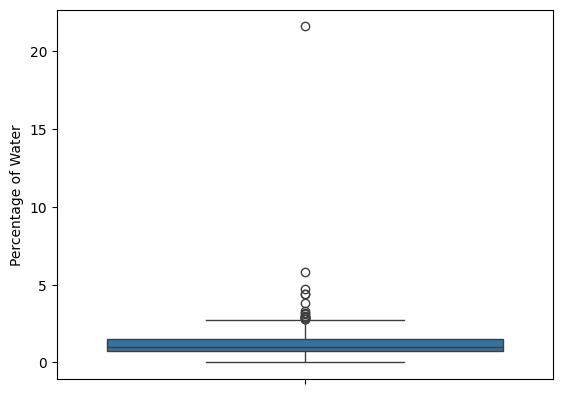

In [201]:
#vertical box plot of water
fig, ax = plt.subplots()
sns.boxplot(data = LandUsedf, y = "Water_Clean")
plt.ylabel("Percentage of Water")

plt.show()

There are two ways to add a category: by adding this as a group on our x-axis, adding a colour (`hue`), or both! Add `Region` to the x-axis on your box plot below:

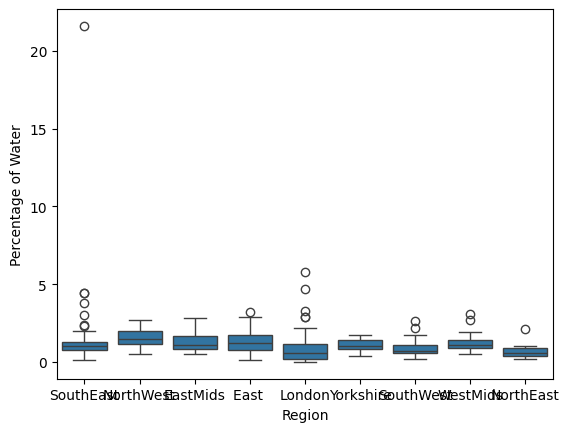

In [202]:
#box plot of water by LA geography
fig, ax = plt.subplots()
sns.boxplot(data = LandUsedf, y = "Water_Clean", x = 'Region')
plt.ylabel("Percentage of Water")

plt.show()

This looks good, but we can't read the x axis very well, so we can change the size of the plot using the `figsize` parameter, which changes the size of our axes.

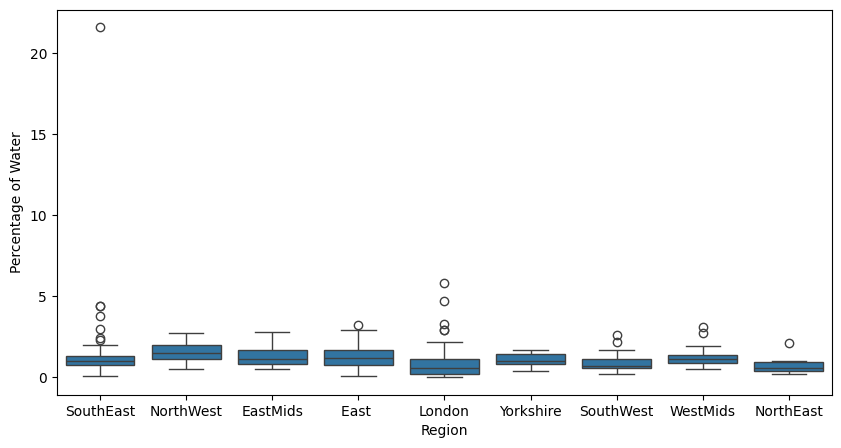

In [203]:
fig, ax = plt.subplots(figsize=(10, 5)) #change the figure size
fig = sns.boxplot(data = LandUsedf, y = "Water_Clean", x = "Region")
plt.ylabel("Percentage of Water")

plt.show()

Great! Now, see if you can add a third variable (whether or not the local area is in London) by specifying the `hue` parameter, which should go after your x and y variables

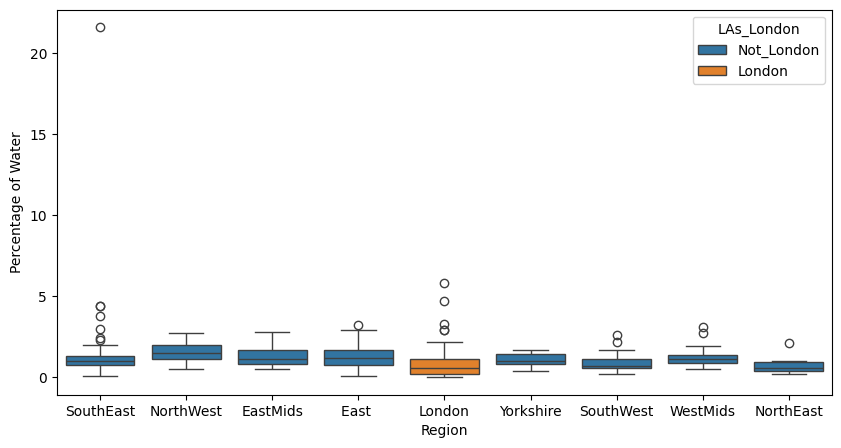

In [204]:
#add a third variable to the box plot
fig, ax = plt.subplots(figsize=(10, 5)) #change the figure size
sns.boxplot(data = LandUsedf, y = "Water_Clean", x = "Region", hue = "LAs_London")
plt.ylabel("Percentage of Water")

plt.show()

As you'll see, this has only changed the colour of one box, as one of our geographies relates to London Boroughs- but the idea works for any categorical variable.

To examine our distribution in more detail, we can use violin plots, which work very similarly to box plots. In fact- the standard version includes a box plot! Adapt your code above to create a two-variable violin plot- see if you can find the command to do it [here](https://seaborn.pydata.org/generated/seaborn.violinplot.html)!

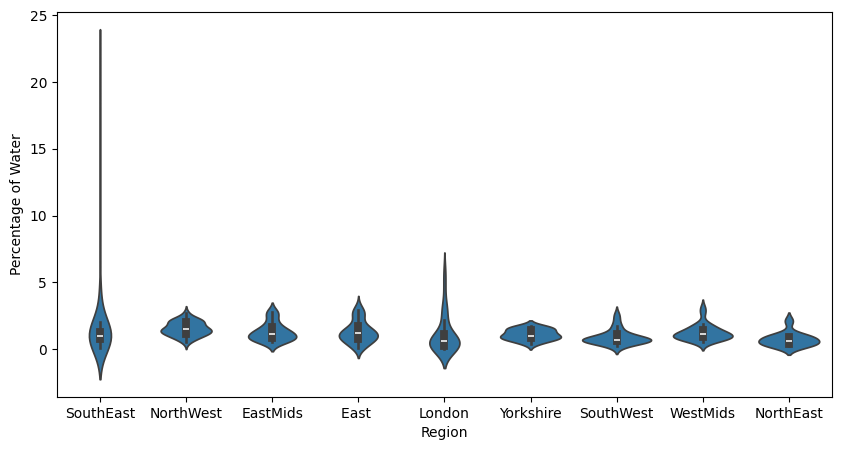

In [205]:
#create a violin plot
fig, ax = plt.subplots(figsize=(10, 5)) #change the figure size
sns.violinplot(data = LandUsedf, y = "Water_Clean", x = "Region")
plt.ylabel("Percentage of Water")

plt.show()

We can additionally add different visuals to the centre of our violin plots, using the `inner` command. Can you add quartiles, using the guidance above?

Add a quartile to the centre of the violin plots:

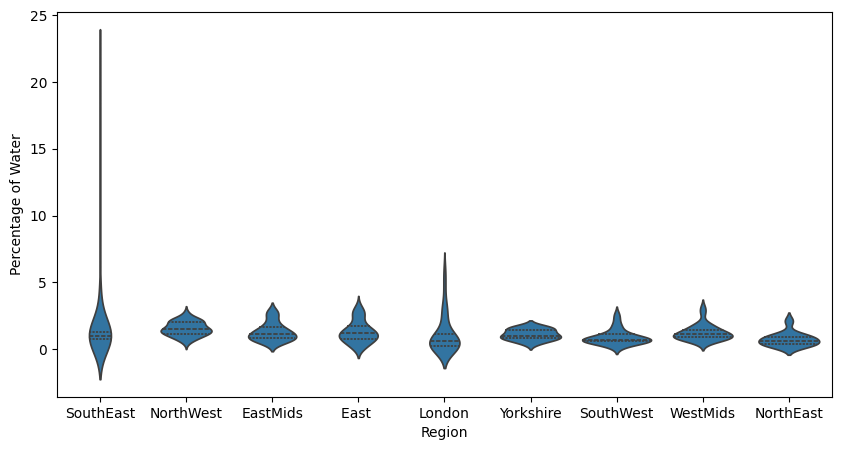

In [206]:
#add quartiles using the 'inner' command
fig, ax = plt.subplots(figsize=(10, 5)) #change the figure size
sns.violinplot(data = LandUsedf, y = "Water_Clean", x = "Region", inner = 'quart')
plt.ylabel("Percentage of Water")

plt.show()

Change the colours of the violin plots using the [palette](https://seaborn.pydata.org/tutorial/color_palettes.html) command. Pick your favourite!

<ipython-input-207-7c200615193a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = LandUsedf, y = "Water_Clean", x = "Region", inner = 'quart', palette="tab10")


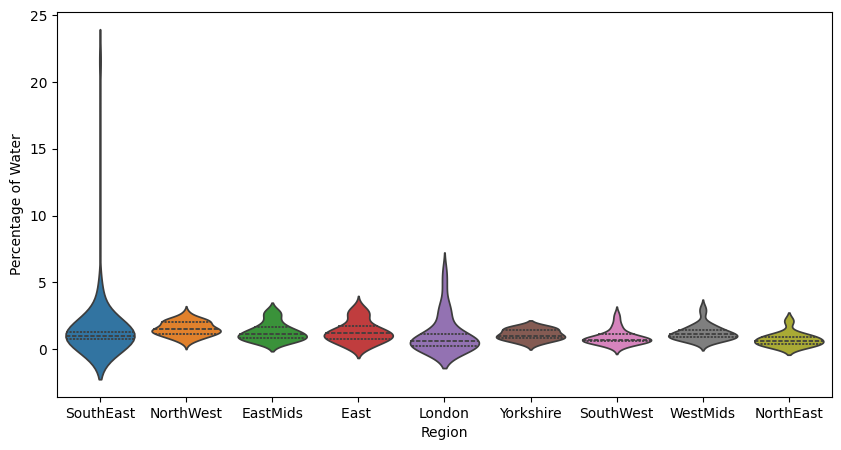

In [207]:
#add different colours using palette to your plot
fig, ax = plt.subplots(figsize=(10, 5)) #change the figure size
sns.violinplot(data = LandUsedf, y = "Water_Clean", x = "Region", inner = 'quart', palette="tab10")
plt.ylabel("Percentage of Water")

plt.show()

<br><br><br>
## Calculating Variables

We saw last week how to do some basic maths in Python. Now we'll use these same operations to calculate new variables. One factor that's often useful for studying local areas is population density, which we can calculate as the number of people per unit area. As we have both of these variables in our data, we should be able to easily calculate the population density. But first, we need to check our data is in the correct units. Describe the area column:



In [208]:
#describe area
LandUsedf['Area'].describe()

,Area
count,3.090000e+02
mean,4.301940e+08
std,5.930219e+08
min,3.147460e+06
25%,8.009884e+07
50%,2.169684e+08
75%,5.786797e+08
max,5.078359e+09


These numbers are really big- because they're in metres squared. It would be easier to work with in km squared. So using the forward slash symbol `/` to specify division, divide the Area column by 100000 to convert it to km2:

In [209]:
#calculate area in km2
LandUsedf['Area_km2'] = LandUsedf['Area']/100000
LandUsedf['Area_km2'].describe()

,Area_km2
count,309.000000
mean,4301.940423
std,5930.218595
min,31.474603
25%,800.988439
50%,2169.684411
75%,5786.797195
max,50783.585380


Finally, we can now calculate people per area, by dividing our `Population` column by our new `Area_km2` column, to get the number of people per km2. Do this below, calling your new column `Pop_density`

In [210]:
#calculate population density
LandUsedf['Pop_density'] = LandUsedf['Population']/LandUsedf['Area_km2']

In [211]:
#view the new column
LandUsedf['Pop_density']

,Pop_density
10,148.288730
11,7.311701
12,47.820602
13,74.044763
14,116.012572
...,...
314,331.592394
315,20.276636
316,34.953620
317,52.356216


<br><br><br>
## Categorical Data and Visual Comparisons

As well as box and violin plots, bar charts are great for categorical data. Similar to a histogram, a bar chart includes well, bars, but this time they are separated by category rather than a number of bins.

We'll start with a simple category bar chart of the number of different types of local area (our `Geography` variable). This time, to change the size of our plot, we simply change the 'aspect'.

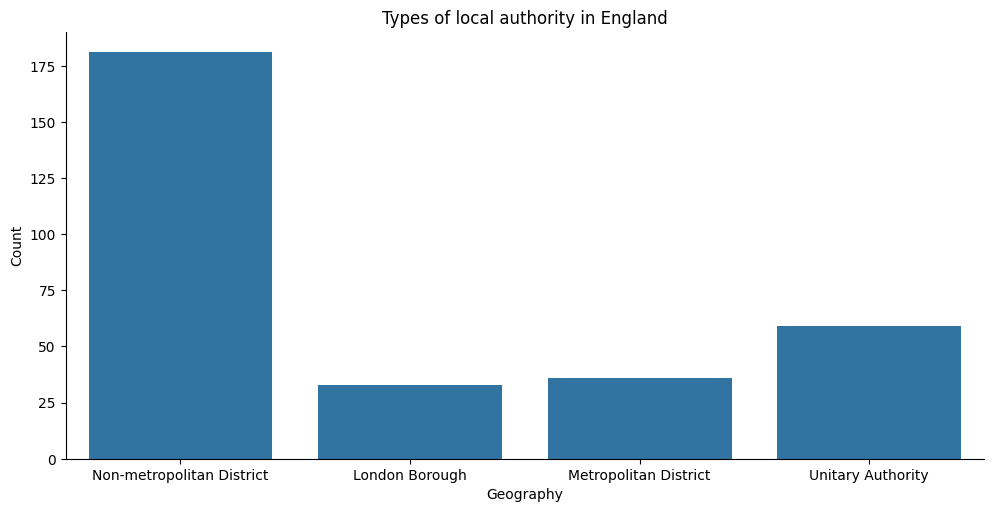

In [212]:
fig = sns.catplot(data = LandUsedf, x = "Geography", kind = 'count', aspect =2)
#count tells Python how we want to measure the variable
plt.title("Types of local authority in England")
plt.ylabel("Count")

plt.show()

As well as dividing up our categorical data, we can create subsets based on the categories themselves. In week 1, we did this by specifying the columns; this time, we'll do it by selecting rows with certain categorical values. To check our different categories, call the `value_counts` function on the geography column:

In [213]:
LandUsedf['Geography'].value_counts()

,count
Geography,
Non-metropolitan District,181
Unitary Authority,59
Metropolitan District,36
London Borough,33


Now we remember the categories, we can start by subsetting non-metropolitan districts.

In [214]:
non_met = LandUsedf[(LandUsedf['Geography'] == 'Non-metropolitan District')] #create a data frame for non-metropolitan areas

In [215]:
#view the top of the new dataframe
non_met.head()

,LAD22CD,LAD22NM,LAs_London,Community_Buildings,Defence,Commerce,Landfill,Mining,Residential,Transport,...,Recreation,Gardens,Vacant,Water_Clean,Region,Area,Geography,Population,Area_km2,Pop_density
10,E07000223,Adur,Not_London,3.2,0.0,0.8,0.0,0.0,4.5,10.8,...,3.1,13.4,0.4,0.8,SouthEast,4.364796e+07,Non-metropolitan District,64725,436.479562,148.288730
11,E07000026,Allerdale,Not_London,0.2,0.0,0.1,0.0,0.0,0.3,2.3,...,1.5,1.3,0.1,2.0,NorthWest,1.320568e+09,Non-metropolitan District,96556,13205.682950,7.311701
12,E07000032,Amber Valley,Not_London,0.8,0.0,0.6,0.0,0.0,1.6,4.2,...,3.4,7.1,0.3,0.8,EastMids,2.654379e+08,Non-metropolitan District,126934,2654.378956,47.820602
13,E07000224,Arun,Not_London,0.8,0.0,0.4,0.0,0.1,2.6,5.7,...,2.0,9.6,0.4,0.7,SouthEast,2.247033e+08,Non-metropolitan District,166381,2247.032658,74.044763
14,E07000170,Ashfield,Not_London,1.9,0.0,1.7,0.1,0.0,3.4,7.1,...,7.5,12.5,0.4,0.5,EastMids,1.095580e+08,Non-metropolitan District,127101,1095.579541,116.012572


Now create three new dataframes, based on the other categories. Call these: `unitary`, `met`, and `london`.

In [216]:
#unitary subset
unitary = LandUsedf[(LandUsedf['Geography'] == 'Unitary Authority')]

In [217]:
#metropolitan subset
met = LandUsedf[(LandUsedf['Geography'] == 'Metropolitan District')]

In [218]:
#london subset
london = LandUsedf[(LandUsedf['Geography'] == 'London Borough')]

Now we've got our subsets, we can plot them side by side to make easy visual comparisons between our data. This is often a good alternative to adding additional bars to our histogram if, say, the plot is getting too busy. We do this using subplots. This is where our `subplots` command at the top of our figure becomes really useful, as we can tell Python how many rows and columns we want in our figure. We'll plot the distribution of Vacant Land in each local area, by type of authority.

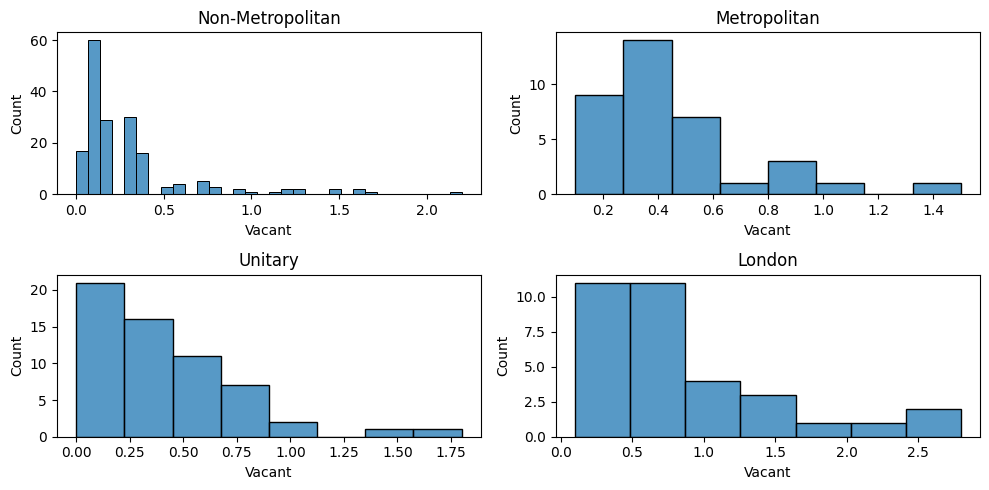

In [219]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(10, 5)) #create a 2 by 2 grid for our subplots
sns.histplot(non_met['Vacant'], ax = axes[0,0]).set_title('Non-Metropolitan') #row 0, column 0 (remember we start counting from 0)
sns.histplot(met['Vacant'], ax = axes[0,1]).set_title('Metropolitan') #row 0, column 1
sns.histplot(unitary['Vacant'], ax = axes[1,0]).set_title('Unitary') #row 1, column 0
sns.histplot(london['Vacant'], ax = axes[1,1]).set_title('London') #row 1, column 1


plt.tight_layout() #spaces our subplots nicely
plt.show()

<br><br><br>
## Exploring Relationships
Another way of starting to visually explore relationships between two (or more) variables is through scatter plots. We'll try scatter plots in Seaborn. There are different commands which have slightly different options, but for simplicity we'll stick with `scatterplot()`, which plots the _relationship_ between two variables, for now. For our basic plot, all we need to do is specify the x and the y variables. Let's test our our new `Pop_density` variable, and explore how this relates to the percentage of land given to `Agriculture`. Add these as the x and y variables, below, as well as axis labels and a title.

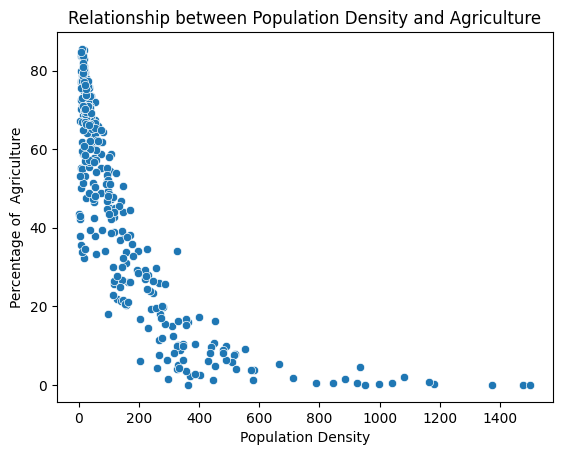

In [220]:
fig = sns.scatterplot(data = LandUsedf, x = "Pop_density", y = "Agriculture")
plt.xlabel("Population Density")
plt.ylabel("Percentage of  Agriculture")
plt.title("Relationship between Population Density and Agriculture")

plt.show()

This should give us an interesting curve. To find out more about what's going on here, we can add a third variable by `hue`, which colour codes our points according to which category they are in. Add our `Geography` variable as the hue, and see if this helps you spot any patterns.

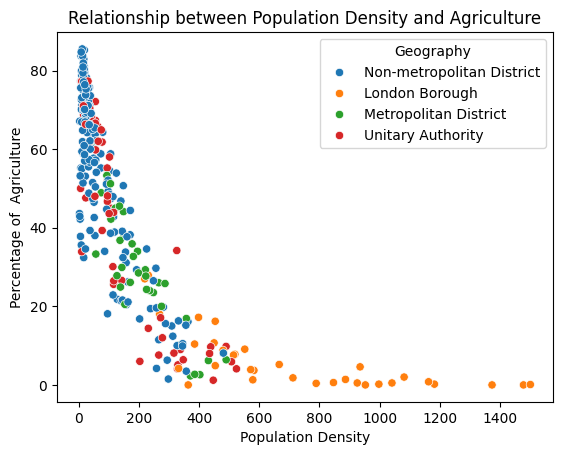

In [221]:
#adapt the plot above with the hue according to the Geography variable
fig = sns.scatterplot(data = LandUsedf, x = "Pop_density", y = "Agriculture", hue="Geography")
plt.xlabel("Population Density")
plt.ylabel("Percentage of  Agriculture")
plt.title("Relationship between Population Density and Agriculture")

plt.show()

You may be able to see how different types of geography have different population densities and different percentages of agriculture. To allow us to look into this further, we can change the size, shape, colour, and transparency of our markers to make the most effective visualisation.
The parameters we can add are:
- `color` (note the American spelling) to change the color
- `palette` to set multiple colours, for palettes see [Seaborn colours here](https://seaborn.pydata.org/tutorial/color_palettes.html),
- `marker` the shape of the marker,
- `hue` to set the categories to colour,
- `alpha` the transparency of the marker (lower values are more transparent),
- `s` to change the size of the marker,
- `size` to size the marker based on another variable.

Let's play around with these. Firstly, recreate the plot above, but the marker to a triangle using `^` and choose a different colour palette:




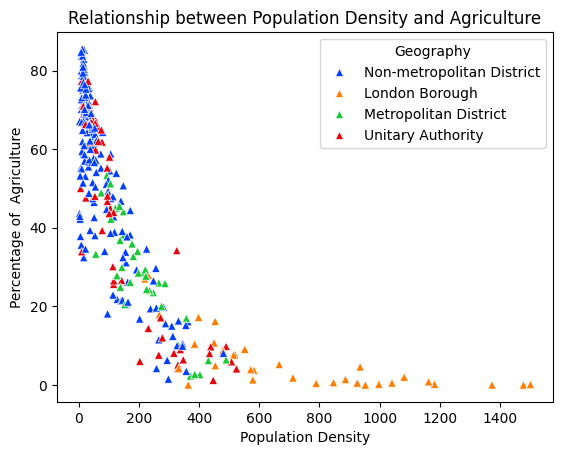

In [222]:
#create your customised plot
fig = sns.scatterplot(data = LandUsedf, x = "Pop_density", y = "Agriculture", hue="Geography", marker='^', palette="bright")
plt.xlabel("Population Density")
plt.ylabel("Percentage of  Agriculture")
plt.title("Relationship between Population Density and Agriculture")

plt.show()

This time, make the markers circular, bigger, and transparent:

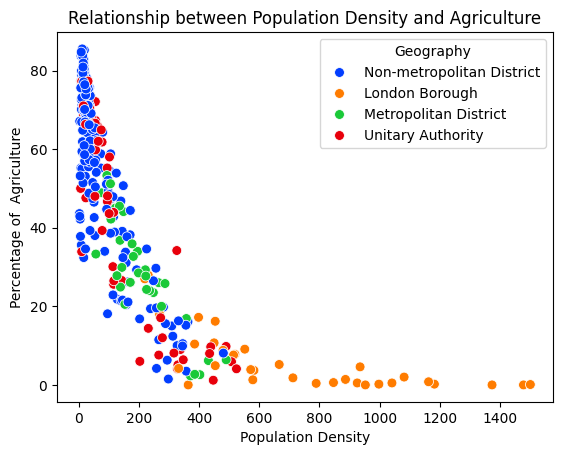

In [223]:
#create your customised plot
fig = sns.scatterplot(data = LandUsedf, x = "Pop_density", y = "Agriculture", hue="Geography", palette="bright", alpha = 1, s = 50 )
plt.xlabel("Population Density")
plt.ylabel("Percentage of  Agriculture")
plt.title("Relationship between Population Density and Agriculture")

plt.show()

<br><br><br>
## Saving Plots
Now we've gone to all the trouble of making lots of fancy visualisations, we might want to save them as an image. This is straightforward to do.
Once you're happy with your scatter plot, create the plot again, and save it using the following `savefig()` command.

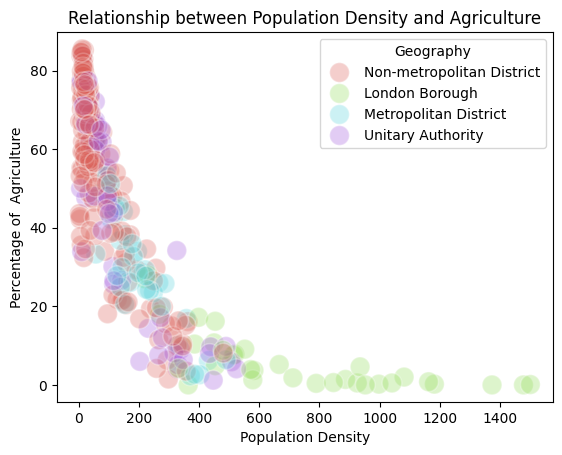

In [224]:
fig = sns.scatterplot(data = LandUsedf, x = "Pop_density", y = "Agriculture",
                      hue = 'Geography', palette = 'hls', s = 200, alpha = 0.3 )
plt.xlabel("Population Density")
plt.ylabel("Percentage of  Agriculture")
plt.title("Relationship between Population Density and Agriculture")

plt.savefig('fig1.png')

Note that will save the file in the current directory (where this lab notebook is saved)- which may be under the files on Colab. You can then navigate to the file and download it to your computer.

### <br><br><br>
## Formative Homework Questions
Well done on completing lab 3! To test your new skills, here are three further questions for you to complete as homework. Please submit our answers under 'Week 3 Homework Questions' on Minerva to check your understanding. If you have any queries, please ask the lecturers or lab demonstrators!

__Question 1&2:__ Calculate a new variable that gives you the total area of grassland in each Local Authority area. Report the maximum and mean values, rounding them to two decimal places (2dp).  

<br>

__Question 3:__ You may notice that the percentages of different land use don't quite add up to 100. Create a new column called 'unknown' and Calculate the percentage of unknown land use. What is the percentage for Leeds?

__Hint:__ The python [sum](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html) function may speed things up here.

<br>

__Question 4:__ Have a look at the [documentation](https://seaborn.pydata.org/generated/seaborn.relplot.html) for `relplot`, a seaborn function that extends the capabilities of `scatterplot` by allowing you to plot multiple scatter graphs next to each other (called facet grids), to explore these relationships in more detail. Create a 3x3 facet grid of the relationship betwen two continuous variables of your choice, divided up by the 'Region' category. (You don't need to submit this- you can check the answers next week!)



# Question 1 and 2

In [225]:
LandUseEng.head()

,LAD22CD,LAD22NM,LAs_London,Community_Buildings,Defence,Commerce,Landfill,Mining,Residential,Transport,...,Unknown_development,Agriculture,Forests,Natural,Grassland,Water,Recreation,Gardens,Vacant,Water_Clean
10,E07000223,Adur,Not_London,3.2,0.0,0.8,0.0,0.0,4.5,10.8,...,2.9,50.7,4.0,1.5,2.2,0.8,3.1,13.4,0.4,0.8
11,E07000026,Allerdale,Not_London,0.2,0.0,0.1,0.0,0.0,0.3,2.3,...,1.0,55.2,7.1,20.3,8.2,2.0,1.5,1.3,0.1,2.0
12,E07000032,Amber Valley,Not_London,0.8,0.0,0.6,0.0,0.0,1.6,4.2,...,2.8,66.5,9.8,0.2,0.8,0.8,3.4,7.1,0.3,0.8
13,E07000224,Arun,Not_London,0.8,0.0,0.4,0.0,0.1,2.6,5.7,...,2.9,55.2,16.3,0.6,0.7,0.7,2.0,9.6,0.4,0.7
14,E07000170,Ashfield,Not_London,1.9,0.0,1.7,0.1,0.0,3.4,7.1,...,3.9,42.8,14.0,0.0,1.3,0.5,7.5,12.5,0.4,0.5


In [226]:
GrasslandArea = LandUseEng['Grassland']
GrasslandArea.head()

,Grassland
10,2.2
11,8.2
12,0.8
13,0.7
14,1.3


In [227]:
round(GrasslandArea.max(), 2)

29.0

In [228]:
round(GrasslandArea.min(), 2)

0.0

# Question 3

In [239]:
LandUseEng = LandUseEng.drop('Water', axis=1)
LandUseEng

,LAD22CD,LAD22NM,LAs_London,Community_Buildings,Defence,Commerce,Landfill,Mining,Residential,Transport,...,Unknown_development,Agriculture,Forests,Natural,Grassland,Recreation,Gardens,Vacant,Water_Clean,Unknown
10,E07000223,Adur,Not_London,3.2,0.0,0.8,0.0,0.0,4.5,10.8,...,2.9,50.7,4.0,1.5,2.2,3.1,13.4,0.4,0.8,15.3
11,E07000026,Allerdale,Not_London,0.2,0.0,0.1,0.0,0.0,0.3,2.3,...,1.0,55.2,7.1,20.3,8.2,1.5,1.3,0.1,2.0,1.7
12,E07000032,Amber Valley,Not_London,0.8,0.0,0.6,0.0,0.0,1.6,4.2,...,2.8,66.5,9.8,0.2,0.8,3.4,7.1,0.3,0.8,8.4
13,E07000224,Arun,Not_London,0.8,0.0,0.4,0.0,0.1,2.6,5.7,...,2.9,55.2,16.3,0.6,0.7,2.0,9.6,0.4,0.7,11.6
14,E07000170,Ashfield,Not_London,1.9,0.0,1.7,0.1,0.0,3.4,7.1,...,3.9,42.8,14.0,0.0,1.3,7.5,12.5,0.4,0.5,15.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,E07000229,Worthing,Not_London,3.8,0.0,1.3,0.0,0.0,10.2,13.5,...,4.9,16.3,5.1,0.8,0.7,10.5,29.9,0.2,0.1,32.5
315,E07000238,Wychavon,Not_London,0.4,0.0,0.2,0.1,0.0,0.8,3.7,...,2.0,76.4,7.9,0.1,0.8,1.1,4.4,0.1,1.1,5.2
316,E07000128,Wyre,Not_London,1.1,0.0,0.3,0.1,0.0,1.5,4.0,...,2.4,66.2,4.8,8.3,1.7,1.4,5.3,0.3,1.5,6.5
317,E07000239,Wyre Forest,Not_London,0.9,0.0,0.5,0.0,0.0,1.7,4.6,...,2.3,56.6,18.4,0.3,1.2,2.7,8.1,0.1,1.3,9.5


In [240]:
LandUseEng.iloc[:, 3:18].sum(axis=1)

,0
10,97.3
11,97.6
12,97.9
13,97.3
14,96.6
...,...
314,97.3
315,98.1
316,97.3
317,97.3


In [241]:
LandUseEng['Unknown'] = 100 - LandUseEng.iloc[:, 3:18].sum(axis=1)

In [242]:
LandUseEng.head()

,LAD22CD,LAD22NM,LAs_London,Community_Buildings,Defence,Commerce,Landfill,Mining,Residential,Transport,...,Unknown_development,Agriculture,Forests,Natural,Grassland,Recreation,Gardens,Vacant,Water_Clean,Unknown
10,E07000223,Adur,Not_London,3.2,0.0,0.8,0.0,0.0,4.5,10.8,...,2.9,50.7,4.0,1.5,2.2,3.1,13.4,0.4,0.8,2.7
11,E07000026,Allerdale,Not_London,0.2,0.0,0.1,0.0,0.0,0.3,2.3,...,1.0,55.2,7.1,20.3,8.2,1.5,1.3,0.1,2.0,2.4
12,E07000032,Amber Valley,Not_London,0.8,0.0,0.6,0.0,0.0,1.6,4.2,...,2.8,66.5,9.8,0.2,0.8,3.4,7.1,0.3,0.8,2.1
13,E07000224,Arun,Not_London,0.8,0.0,0.4,0.0,0.1,2.6,5.7,...,2.9,55.2,16.3,0.6,0.7,2.0,9.6,0.4,0.7,2.7
14,E07000170,Ashfield,Not_London,1.9,0.0,1.7,0.1,0.0,3.4,7.1,...,3.9,42.8,14.0,0.0,1.3,7.5,12.5,0.4,0.5,3.4


In [244]:
LandUseEng[(LandUseEng.LAD22NM == 'Leeds')]['Unknown']

,Unknown
153,5.4


# Question 4

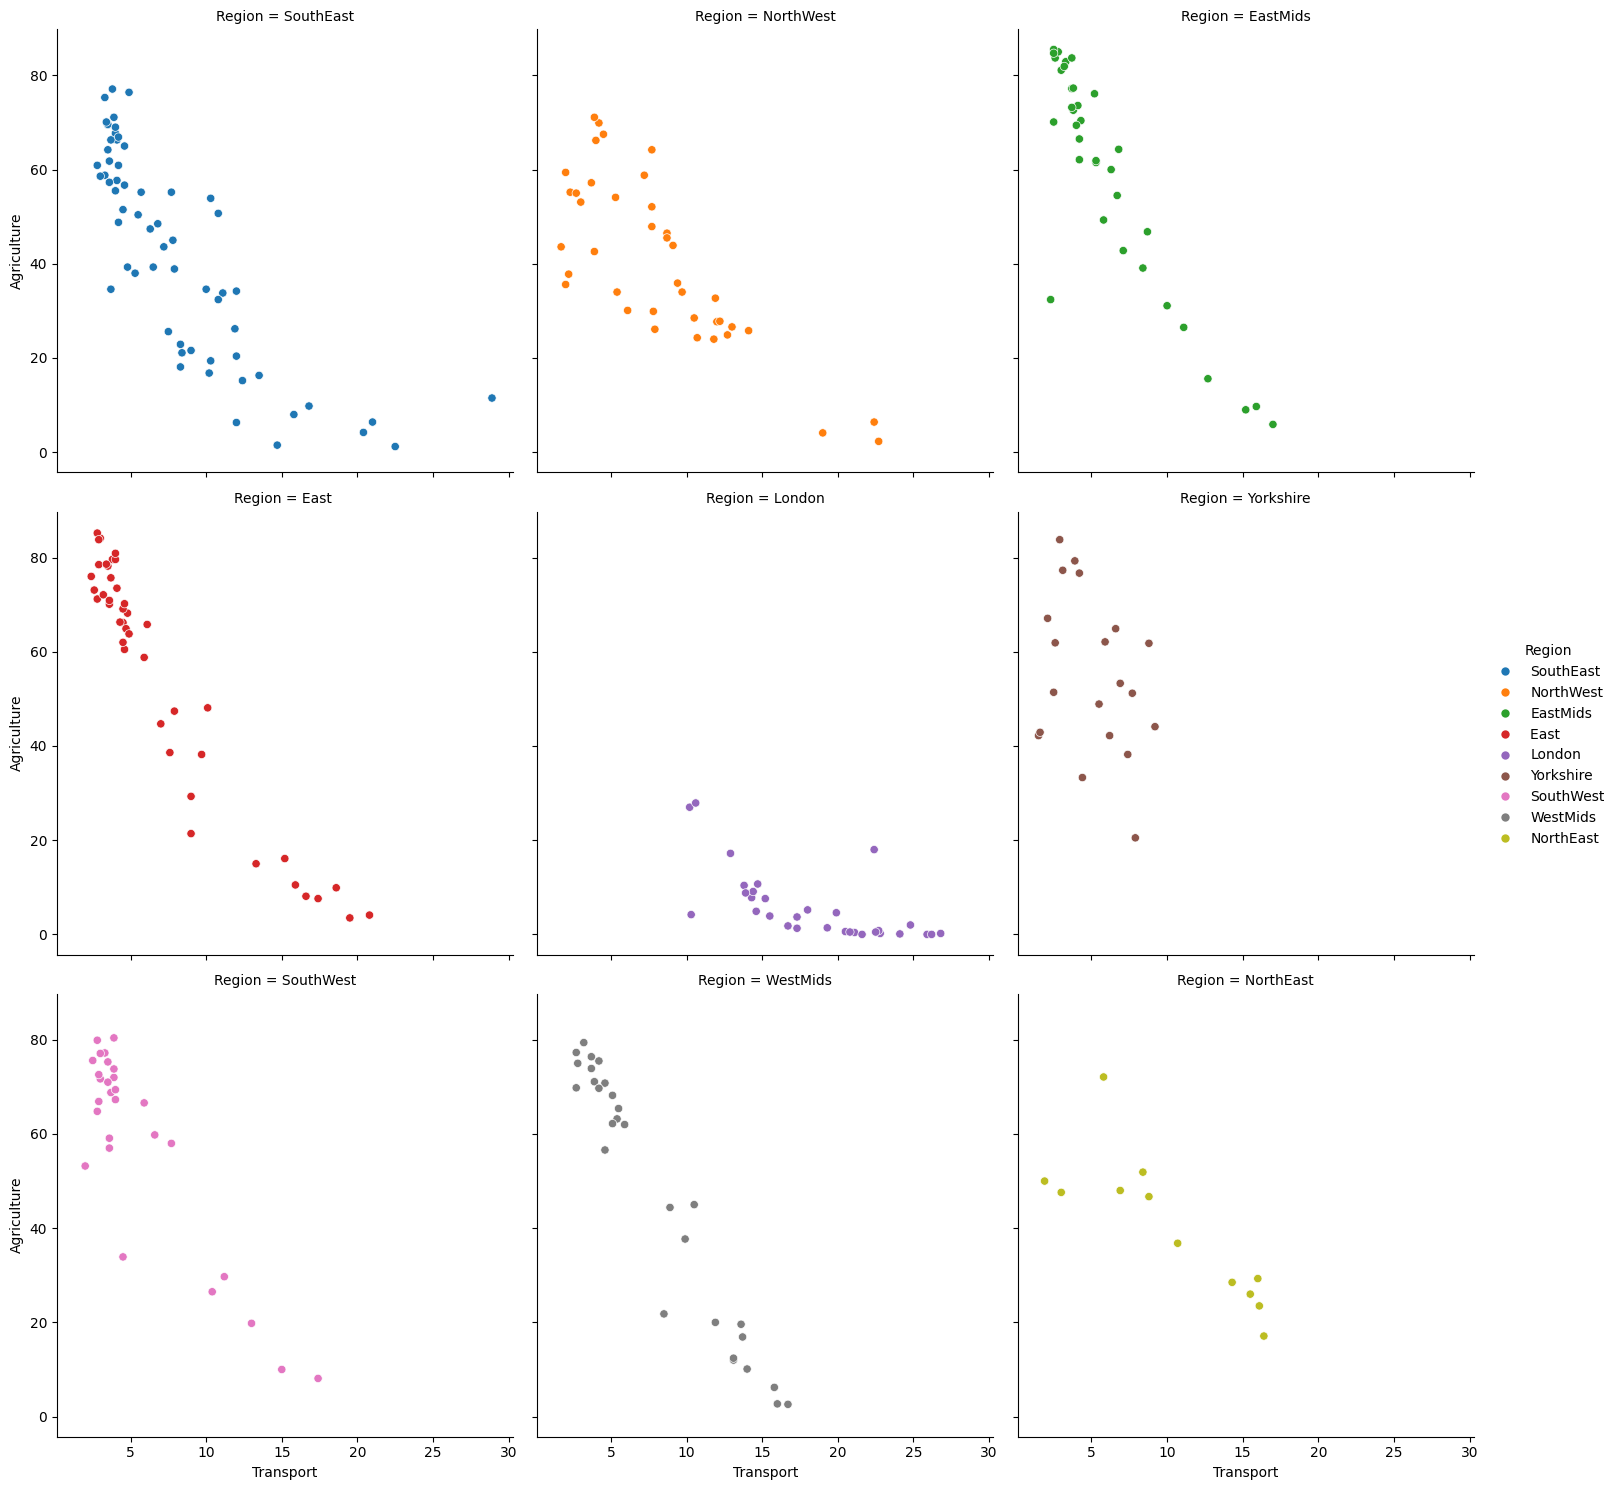

In [250]:
sns.relplot(data = LandUsedf, x = "Transport", y = "Agriculture", hue = "Region", col = "Region", col_wrap = 3)